# Imports

In [1]:
from config import *
from core import *
from helper import *


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import os
from tqdm import tnrange, tqdm_notebook
from sys import getsizeof
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Config

In [5]:
frequencies = [0, 1, 2, 3] #, 4, 5]
bases = [20]
qtables = [
    PHOTOSHOP_FOR_WEB_100_LUM
]

NATURAL = True
GAN_GENERATED = False

In [3]:
import pickle

nat_img_root_dir = "E:\\Work\\MASc\\DoGAN\\DoGANs-dataset\\new\\Pristine\\GGAN256\\lsun_tower"
# nat_files = os.listdir(nat_img_root_dir)

gen_img_root_dir = "E:\\Work\\MASc\\DoGAN\\DoGANs-dataset\\new\\Generated\\GGAN256\\lsun_tower"
# gen_files = os.listdir(gen_img_root_dir)
# with open(f"{gen_img_root_dir}.pkl", 'wb') as f:
#     pickle.dump(gen_files, f)
# nat_files = pickle.load(open(f"{nat_img_root_dir}_file_list.pkl"))
# gen_files = pickle.load(open(f"{gen_img_root_dir}.pkl"))


with open(f"{nat_img_root_dir}_file_list.pkl", 'rb') as f:
    nat_files = pickle.load(f)
with open(f"{gen_img_root_dir}.pkl", 'rb') as f:
    gen_files = pickle.load(f)

In [ ]:
# model = RandomForestClassifier(warm_start = True)

features = []

batch_size = 5000

for i in tnrange(batch_size):
    img = load_image_from_file(os.path.join(nat_img_root_dir, nat_files[i]))
    features.append(generate_benford_feature(img, frequencies, bases, qtables, NATURAL))
    
with open(f"{nat_img_root_dir}_benford_features_0_4999.pkl", 'wb') as f:
    pickle.dump(features, f)
    
for i in tnrange(batch_size):
    img = load_image_from_file(os.path.join(gen_img_root_dir, nat_files[i]))
    features.append(generate_benford_feature(img, frequencies, bases, qtables, NATURAL))
    
with open(f"{gen_img_root_dir}_benford_features_0_4999.pkl", 'wb') as f:
    pickle.dump(features, f)

c:\users\sghavam\appdata\local\pypoetry\cache\virtualenvs\syde-672-project--kliwxf7-py3.7\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  import sys


3.2456917173439086 - -1.2232619073179 - 2.6206165433163235
3.2456917173439086 - -1.2232619073179 - 2.6206165433163235
3.1231145141856587 - -1.435547439046283 - 2.8973877956361704
3.1231145141856587 - -1.435547439046283 - 2.8973877956361704
3.2159962539262543 - -1.4338781017769635 - 2.9305073850946486
3.2159962539262543 - -1.4338781017769635 - 2.9305073850946486
2.883217793324011 - -1.1236839376238084 - 4.128119873032874
2.883217793324011 - -1.1236839376238084 - 4.128119873032874
2.8481988250993413 - -1.2412913233659366 - 3.0037807449034366
2.8481988250993413 - -1.2412913233659366 - 3.0037807449034366
2.855583060242253 - -1.0980152641414227 - 4.1422171803127465
2.855583060242253 - -1.0980152641414227 - 4.1422171803127465
2.878673058332852 - -1.2786133164317337 - 2.955760027136103
2.878673058332852 - -1.2786133164317337 - 2.955760027136103
2.8839237046389057 - -1.1324202359315412 - 4.1238593035622495
2.8839237046389057 - -1.1324202359315412 - 4.1238593035622495
2.7972434379028774 - -1.19

In [29]:
train,test = train_test_split(gen_files, test_size = 0.3, train_size = 0.7)

50001

# Run Sample

In [2]:
import numpy as np

A = np.asarray([1,2,3,4,5])

for a in A:
    a = 10-a

print(A)

[1 2 3 4 5]


<Figure size 432x288 with 0 Axes>

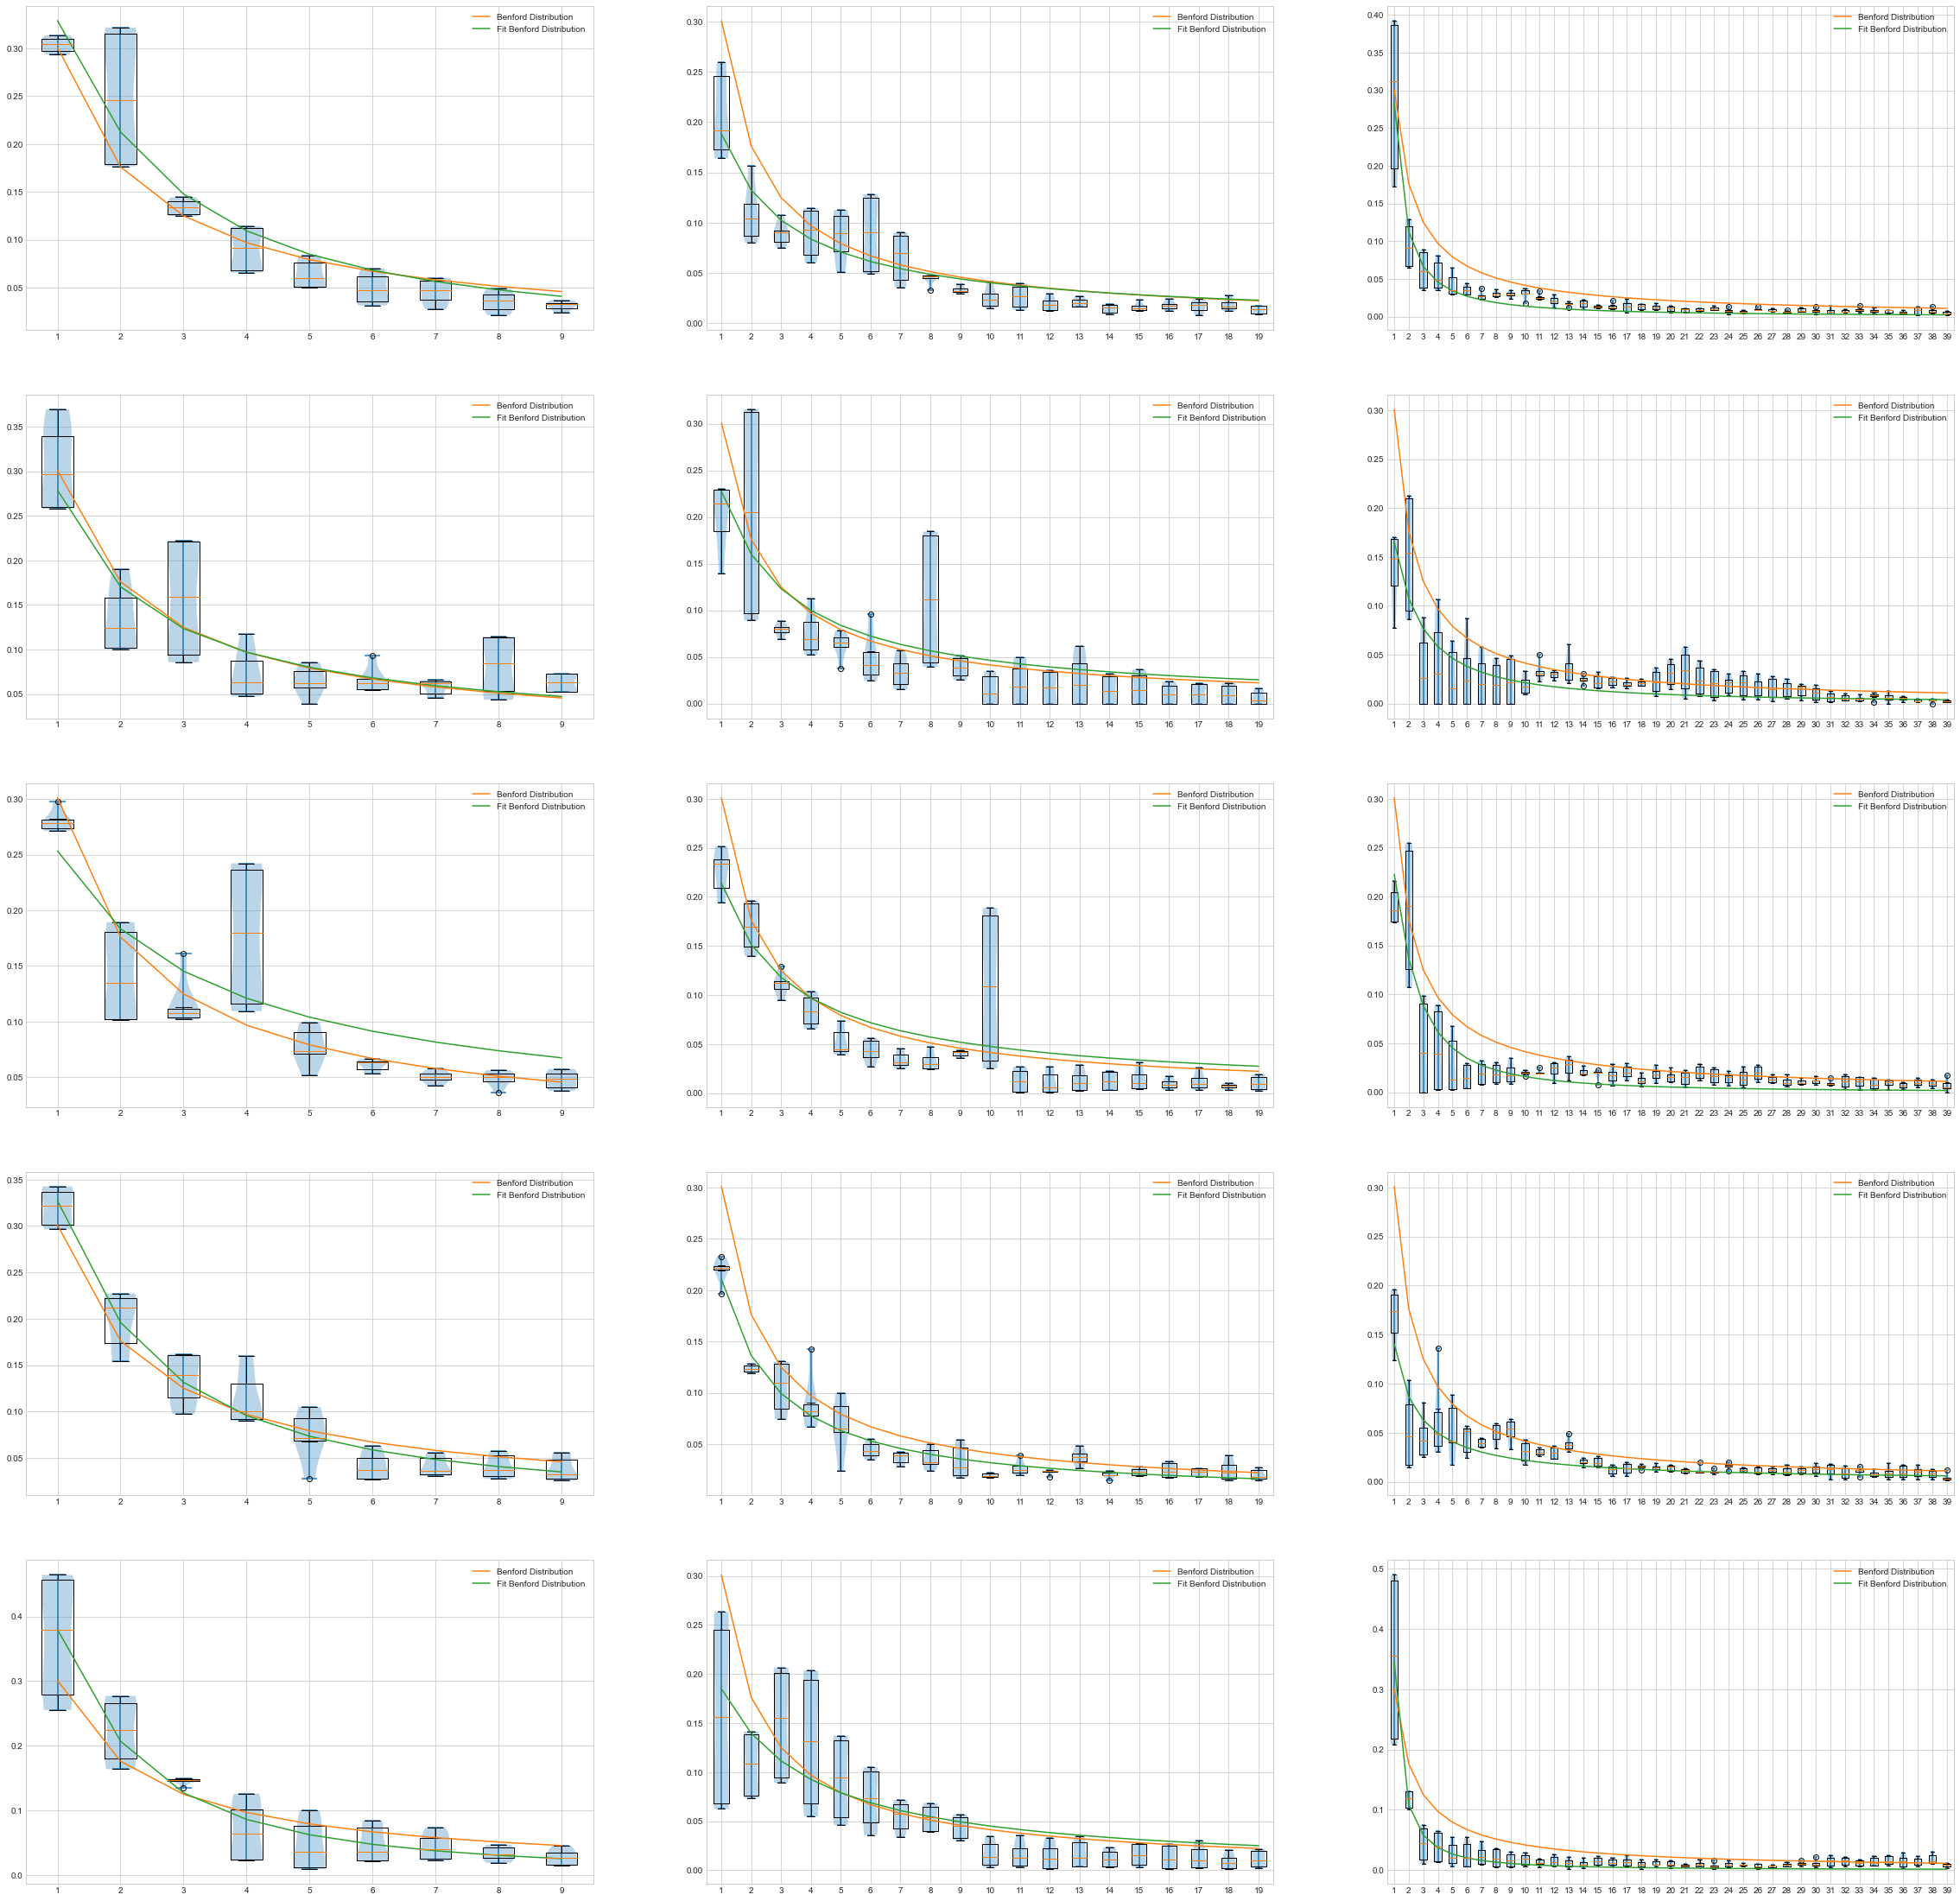

In [79]:
plot_pmfs(nat_img_batch)

# Plots

In [85]:
def plot_pmfs(img_batch):
    # Create a figure instance
    fig = plt.figure()

    fig, axes = plt.subplots(nrows=len(img_batch), ncols=3, figsize=(40, 40))

    for k,img in enumerate(img_batch):
        dct_coeffs = get_image_dct_coefs(img, frequencies, [q.matrix for q in qtables])
        for j,base in enumerate(bases):
#             fig = plt.figure()
            
            # Get DCT Coefficient First Digits
            fds = dct_coeff_to_first_digit(dct_coeffs, base)

            # Get FD pmf
            pmf = get_dct_fd_pmf(fds, base)

            # across all frequencies
            p_digit = [pmf[i,:,0] for i in range(base-1)]
            
            p_digit_mean = [np.mean(p) for p in p_digit]
            
            pfit = fit_benford_p(p_digit_mean)
            pbenf = benford_pmf(base)
            
            ds = [d+1 for d in range(base-1)]
#             axes[k,j].violinplot(p_digit)
#             axes[k,j].boxplot(p_digit)
            axes[k,j].scatter(ds, p_digit, alpha = 0.3)
            axes[k,j].plot(ds, pbenf, label='Benford Distribution')
            axes[k,j].plot(ds, pfit, label='Fit Benford Distribution')
            axes[k,j].legend()
#             plt.violinplot(p_digit)
#             plt.boxplot(p_digit)
#             plt.plot([d+1 for d in range(base-1)], pbenf, label='Benford Distribution')
#             plt.plot([d+1 for d in range(base-1)], pfit, label='Fit Benford Distribution')
#             plt.legend()
#             plt.savefig(f'pmfs_{k}_{j}.jpg')
            
#             print(div_jensen_shannon(pbenf, pfit), end='\t ')
            
#         print("")
            

    # Create the boxplot
    plt.show()

In [72]:
ds = [d for d in range(10-1)]

def benford_pmf(base):
    return np.asarray([log(1+1/(d+1), 10) for d in range(base-1)])

def get_dct_fd_pmf(fds: np.ndarray, base: int) -> np.ndarray:
    """

    Parameters
    ----------
    fds: np.ndarray
        3D array of first digits.
        Axes:
        - 0: Image blocks
        - 1: DCT frequencies
        - 2: Quantization tables
    base: int
        Base of first digits

    Returns
    -------
    np.ndarray
        Probability mass function of all digits in range [0, base-1] for all frequencies and Q tables.

    """
    ds = [i+0.5 for i in range(base)]
    shape = (base - 1,  fds.shape[1], fds.shape[2])
    pmf = np.zeros(shape)

    for i in range(shape[1]):
        for j in range(shape[2]):
            pmf[:,i,j] = np.histogram(fds[:,i,j], ds)[0]
            pmf[:,i,j] = pmf[:,i,j] / sum(pmf[:,i,j])

    return pmf

1.0


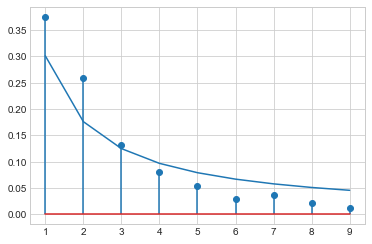

In [73]:
base = 10
ds = [d+1 for d in range(10-1)]
pmf = get_dct_fd_pmf(fds, base)
pbenf = benford_pmf(10)
plt.stem(ds, pmf[:,1,0])
plt.plot(ds, pbenf)
print(sum(pmf[:,1,0]))

In [26]:
def fit_benford_p(p):
    ds = [i+1 for i in range(len(p))]
    x0 = [1,1,1]

    kwargs = {
        'pmf': p,
        'base': base,
        'ds': ds
    }

    xs = least_squares(fun = mmse_benford_cost, x0 = x0 , kwargs = kwargs)

    beta = xs.x[0]
    gamma = xs.x[1]
    delta = xs.x[2]

    pfit = general_benford_pmf(ds, beta, gamma, delta, base)
    
    return pfit

In [40]:
example_gen_img_batch_divs = np.asarray([
    [0.006, 0.057, 1.190],
    [0.154, 0.171, 2.056],
    [0.043, 0.207, 3.039],
    [0.068, 0.137, 0.376],
    [0.091, 0.145, 2.815]
])

example_nat_img_batch_divs = np.asarray([
    [0.010,0.090,0.667],
    [0.007,0.034,0.602],
    [0.045,0.061,0.955],
    [0.023,0.155,0.603],
    [0.063,0.082,1.087]
])

In [89]:
len(p_digit)

39

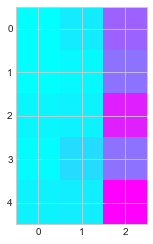

In [42]:
plt.imshow(example_nat_img_batch_divs, cmap='cool', interpolation='nearest')